# Introduction to Requests

Please make sure that you have `requests` installed. 

```bash
pip install requests
```

If you want to follow along, you can get my `API KEY` in Bitwarden under _"DeepAI API Key"_

__Optionally__, if you want to display the bounding boxes using the utility function `display_results`, you would need to install [imgaug](https://github.com/aleju/imgaug) 

```bash
conda config --add channels conda-forge
conda install imgaug
```

## Try out the API first!

To get an idea of what we want to achieve, start [here](https://deepai.org/machine-learning-model/facial-recognition) and try out their simple API using the browser.

![demo](images/00-deepai-demo.png)

## Creating your first post request

In [ ]:
%matplotlib inline

import requests
from pprint import pprint

In [ ]:
url = "https://api.deepai.org/api/facial-recognition"
headers = {'api-key' : 'API KEY'}
sample_image_url = 'https://mountainviewlife.org/wp-content/uploads/2012/02/group.jpg'

![](https://mountainviewlife.org/wp-content/uploads/2012/02/group.jpg)

In [26]:
res = requests.post(url, 
    headers = headers, 
    data={
        'image': sample_image_url
    }
) 

In [ ]:
res.status_code

The response of the server is raw text

In [ ]:
res.text

We can parse this raw text as _json_.

In [ ]:
results = res.json()
pprint(results)

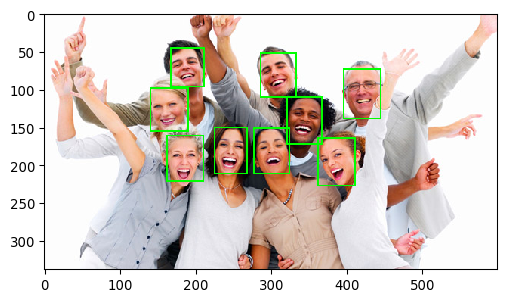

In [28]:
# Make sure to install imgaug first
from util import display_results
display_results(sample_image_url, results)

# Sending an image

Now instead of using a URL, let's upload an image instead!

![sample-image-local](./sample-image.jpg)

Instead of using `data`, we use `files` and pass in a file object.

In [29]:
res = requests.post(url, 
    headers = headers, 
    files={
        'image': open('sample-image.jpg', 'rb')
    }
)

In [ ]:
res.status_code

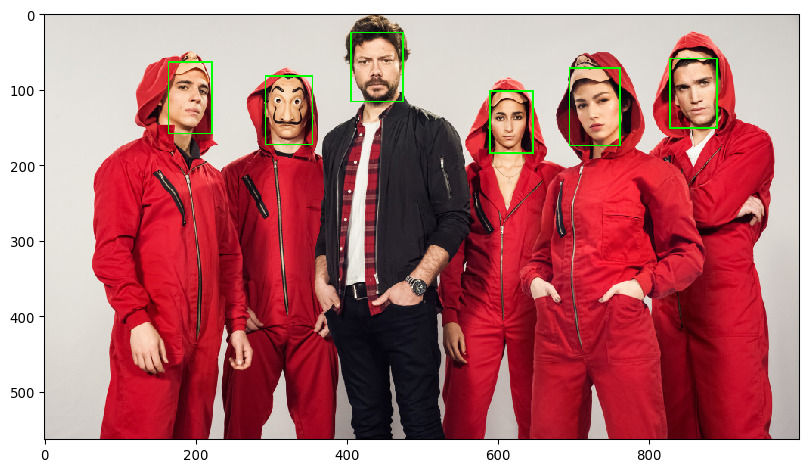

In [30]:
display_results('sample-image.jpg', res.json())

#  Parts of an HTTP request

Now we will just go over the different parts of an HTTP request to get an idea of what they look like. For this I'll be using a proxy to show the raw requests and responses.

In [ ]:
res = requests.post('https://api.deepai.org/api/facial-recognition', 
    headers = {
        'api-key': 'API-KEY-0000-0000-0000'
    }, 
    params = {
        'pretty': True,
        'verbose': True
    },
    data={
        'username': 'pb',
        'password': 'di ko alam'
    },
# These are for using the web proxy
#     proxies = {'https': 'https://localhost:8080'},
#     verify=False
)

![sample_request](images/01-sample-request.png)

## HTTP Method

![HTTP Method](images/02-http-method.png)

Most likely, you are only ever going to need `POST` and `GET`, which is done using `requests.post(...)` and `requests.get(...)` and although there are others such as `PUT` and `DELETE`, I don't think you would need them. 

I guess the main difference between `POST` and `GET`:
- You can send __a form__, __a json__, or __files__ using `POST` requests. 
- Your browser by default uses a `GET` request

Here, try getting the api result from awhile ago using a get request!

In [ ]:
get_url = 'https://api.deepai.org/get_standard_api_result_data/{}'.format(results['id'])
print(get_url)
# requests.get(get_url)

## URL Path

![HTTP Path](images/03-http-path.png)

This is the _endpoint_ that you actually hit. It is like the name of the function or operation that you want to invoke on the the server. 

So for our example, our path is `/api/facial-recognition`

Other possible paths are:
    - `/api/celebrity-recognition`
    - `/api/demographic-recognition`

And to append this to the host to get the url that we hit. For example:

```
https://api.deepai.org/api/demographic-recognition
```

The path __can contain parameters__ as well. Path parameters are usually resource IDs. So the the path

```
https://api.deepai.org/get_standard_api_result_data/b24d9268-228f-4994-902a-031ab16f1e11
```

The ID of the resource we are trying to get is `b24d9268-228f-4994-902a-031ab16f1e11` 

In [ ]:
requests.get(get_url).json()

## Query String

![HTTP Query String](images/04-http-query-string.png)

The query string is one of the ways to send parameters to our API endpoints for both `GET` and `POST` requests. You can manually adding key value pairs after the path. For our example awhile ago

```
POST /api/facial-recognition?pretty=True&verbose=True
```

The query string would be `pretty=True&verbose=True`. In requests, we can add this through the `params` argument.

```python
requests.get(get_url, params={'pretty': True})
```

## Headers

![HTTP Headers](images/05-http-headers.png)

Headers can be used for a lot of things, but __the most common use of it is setting up the API key, or authentication token (for example in OAuth2)__.

Another reason you might want to use the headers is to change the `User-Agent`. By default, the user agent of requests is `python-requests/2.21.0`, which is a dead giveaway when you're trying to scrape stuff. So you might want to change the user agent into something more inconspicuous like 

```
Mozilla/5.0 (Windows NT 10.0; WOW64; rv:52.0) Gecko/20100101 Firefox/52.0
```

## Body 

![HTTP Body](images/06-http-body.png)

The body what we mainly use to send data to the API endpoint. This can be from the form data, like from an HTML form, or _JSON_, which is typically the case. 

What we've been using by using the `data` argument is the form data, which is reflected by the `Content-Type: application/x-www-form-urlencoded`. We can use `json` instead to send the data as JSON.

![HTTP JSON](images/07-http-json.png)



# Status codes and common failures

Status codes tells us whether or not our requests succeeded. We've already seen the (success!) `200` status code previously.

Status code TLDR:
    - __2XX__: Yay!
    - __4XX__: You did something wrong :(
    - __5XX__: They did something wrong XD

## 404 Not Found

Everyone knows this. It's either there is some typo in the _path_ of your request, or the ID of resource you are trying to access. For the example below, can you spot the error?

In [ ]:
res = requests.post('https://api.deepai.org/apis/facial-recognition',  
    headers = headers, 
    data={'image': sample_image_url}
)

In [ ]:
res.status_code

In [ ]:
res.text

We can use `raise_for_status` to raise an exception if the request wasn't sucessful. This is useful when writing your python APIs for some endpoint, so that when your request fails, the calling function can handle it.

In [ ]:
res.raise_for_status()

## 401 Unauthorized

This usually happens when you try to access an API unauthenticated or your authentication has expired. You probably have to signup/login or reauthenticate.

In [ ]:
res = requests.post(url, 
    headers = {
        'api-key': 'quickstart-QUdJIGlzIGNvbWluZy4uLi4K'
    }, 
    data={
        'image': sample_image_url
    }
)

In [ ]:
res.status_code

In [ ]:
res.text

## 400 Bad Request

When it's a __Bad Request__ that probably means there must be something wrong with your input. Some common examples are this are:
    - Required field is not provided
    - Data type of a field is incorrect
    - Added a field it does not recognize
    - Some custom logic. Example: You can only make 3 submissions per 12 hours.
    

In [ ]:
res = requests.post(url, 
    headers = headers, 
    data={'images': sample_image_url}
)

In [ ]:
res.status_code

Sadly, the error message isn't really that helpful. What could the error be? :(

In [ ]:
res.text